In [2]:
from sklearn.linear_model import LogisticRegression
import scipy.io
import numpy as np
import h5py
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.ensemble import RandomForestClassifier

# Load Data

In [4]:
#load data
dataset = 'IndianPines'

if dataset == 'IndianPines':
    data = h5py.File('data/original_paper/data4classification/indian_pines_randomSampling_0.1_run_1.mat', 'r')
    selected_bands = scipy.io.loadmat('data/original_paper/results/drl_30_bands_indian_pines.mat')
elif dataset == 'Botswana':
    data = scipy.io.loadmat('data/original_paper/data4classification/botswana_randomSampling_0.1_run_1.mat')
    selected_bands = scipy.io.loadmat('data/original_paper/results/drl_30_bands_botswana.mat')
    

In [5]:
if dataset == 'IndianPines':
    x_train = np.array(data['x_tra']).transpose()
    y_train = np.argmax(np.array(data['y_tra']).transpose(), axis=1)
    x_test = np.array(data['x_test']).transpose()
    y_test = np.argmax(np.array(data['y_test']).transpose(), axis=1)

elif dataset == 'Botswana':
    x_train = np.array(data['x_tra'])
    y_train = np.argmax(np.array(data['y_tra']), axis=1)
    x_test = np.array(data['x_test'])
    y_test = np.argmax(np.array(data['y_test']), axis=1)
        
selected_bands = selected_bands['selected_bands'][0].astype(int)

In [12]:
def runEvalModel(x_train, y_train, x_test, y_test):
    
    model = LogisticRegression(multi_class='multinomial')
    #model = KNeighborsClassifier()
    #model = RandomForestClassifier()
    model.fit(x_train, y_train)
    
    pred = model.predict(x_test)
    accuracy = accuracy_score(y_true=y_test, y_pred=pred)
    
    return accuracy
    
    

In [13]:
y_test.shape

(9323,)

In [14]:
#running the model using all available bands
print(runEvalModel(x_test, y_test, x_train, y_train))

0.5838926174496645


/Users/danielfurman/.local/share/virtualenvs/danielfurman-DrdL3Zfv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [15]:
selected_bands

array([ 64,  55,  34, 193,  54, 117,  60,  57,  79, 184,  33,  58,  78,
       122,   4,   9,  42,  36, 103,  76,  35,  18, 144,  48,  11,  25,
        97,  66, 199, 129])

In [16]:
#running the model using researchers selected bands
x_train_researchers_bands = x_train[:, selected_bands]
x_test_researchers_band = x_test[:, selected_bands]
print(runEvalModel(x_test_researchers_band, y_test, x_train_researchers_bands, y_train, ))

0.5254074784276127


/Users/danielfurman/.local/share/virtualenvs/danielfurman-DrdL3Zfv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
#random selection
acc = []
available_bands = np.arange(0, x_train.shape[1], 1)
iterations = 200
for i in range(iterations):
    
    sample_bands = np.random.choice(available_bands, 30, replace=False)
    
    x_train_random_bands = x_train[:, sample_bands]
    x_test_random_bands = x_test[:, sample_bands]
    acc.append(runEvalModel(x_test_random_bands, y_test, x_train_random_bands, y_train, ))

/Users/danielfurman/.local/share/virtualenvs/danielfurman-DrdL3Zfv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/danielfurman/.local/share/virtualenvs/danielfurman-DrdL3Zfv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative sol

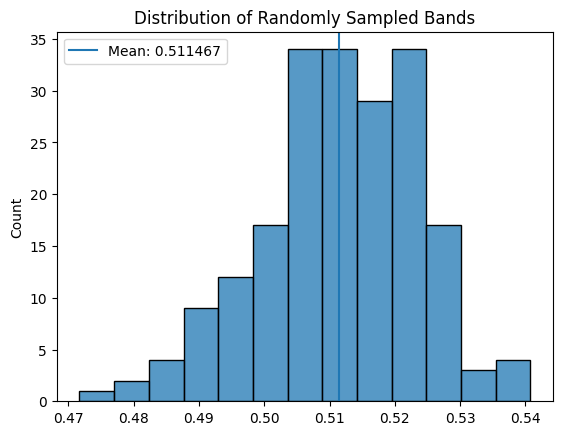

In [19]:
mean_acc = np.mean(acc)

sns.histplot(acc)
plt.axvline(mean_acc, label=f'Mean: {mean_acc:.6f}')
plt.title('Distribution of Randomly Sampled Bands')
plt.legend()
plt.show()